# Cours 5: Analyse de données et visualisation

---

## 4 - 0 Probabilités et analyse combinatoire

## 4 - 1 Data science

**Data science**: interdisciplinary field about scientific processes and systems to **extract knowledge or insights from data** in **various forms**, either structured or unstructured,which is a continuation of some of the data analysis fields such as statistics, machine learning, data mining, and predictive analytics.

Les tâches les plus communes en data science:
- manipuler les données de façon à les rendre compatibles avec les techniques d'analyse à utiliser
    - changer de format (image => matrice de nombres)
    - dealer avec les données manquantes


- analyser les données
    - appliquer des statistiques
    - construire des modèles mathématiques


- communiquer les insights sur les données
    - extraire l'essentiel
    - créer des visualisations

## 4 - 2 Bibliothèques pour l'analyse de données

### 4 - 2 - 1 Pandas

**Pandas** est une library pour **la manipulation et l'analyse de données**. En data science, c'est l'une des libraries à connaître, avec les autres libraries mentionnées dans ce cours.

Features:
- Lecture et écriture dans tout type de format utilisé pour l'analyse de données (ou presque) => csv, html, sql, hdf
    - Possible de prendre un fichier avec un format donné, faire l'analyse via Python et extraire les résultats dans le format initial
    - Possible de convertir les données ou les résultats d'une analyse dans le format demandé par un collaborateur


- Tout type de manipulation de données


- Visualisations


Nous utiliserons les données de [transcriptome](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1706746) d'échantillons issus du dataset "Transcriptome Engineering Promotes a Fermentative Transcriptional State" trouvé sur GEO.

In [1]:
import pandas

data = "GSM1706746_H2217-WT-ETH.1p3-12-1-12.16.09-239-5-1.cuff.gz"

table = pandas.read_table(data)

table.head()

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,R0010W,-,-,R0010W,-,-,2-micron:251-1523,-,-,8628000.0,8217030.0,9038980.0,OK
1,R0020C,-,-,R0020C,-,-,2-micron:1886-3008,-,-,7342700.0,6933830.0,7751580.0,OK
2,R0030W,-,-,R0030W,-,-,2-micron:3270-3816,-,-,15410700.0,14441800.0,16379600.0,OK
3,R0040C,-,-,R0040C,-,-,2-micron:5307-6198,-,-,2348670.0,2081450.0,2615900.0,OK
4,At5g,-,-,At5g,-,-,Arabidopsis_At5g_gene:0-1677,-,-,560901.0,471655.0,650147.0,OK


Commençons par comprendre la table.

Ce sont des **données de RNA-Seq** sur le profil d'expression de cellules de *S. cerevisiae* mises en culture dans un environnement contenant 1 source de carbone (éthanol).

Les colonnes:
- *tracking_id*, *gene_id*, *gene_short_name*, *locus*, *length*: self-explanatory


- tss_id: probablement lié au transcription start site    


- *FPKM*: unité de mesure en RNA-Seq, (= metric fragments per kilobase of transcript per million mapped reads)        
    - *FPKM_conf_lo/hi*: intervalle de confiance        
    - *FPKM_status*: robustesse

Chaque ligne correspond à 1 gène.

In [2]:
type(table)

pandas.core.frame.DataFrame

La table est une **DataFrame**.

Les DataFrames sont l'une des deux data structures de Pandas. Elles servent à contenir des **données tabulatoires**. L'autre data structure, **Series**, correspond à une **unique colonne de données**.

**Une DataFrame se conduit un peu comme un dict**, où les intitulés des colonnes sont les keys et les éléments de la colonne sont les items correspondant à la key.

Pour avoir à peu près la même chose sans Pandas:

In [3]:
import gzip

text = gzip.open(data).read().decode()[:-1].replace("\n", "\t")
# si on fait print(text), on remarque que cette table a 13 colonnes

données_individuelles = text.split("\t")
n = int(len(données_individuelles) / 13)    # n = 6724 lignes

# il faut regrouper les éléments 13 par 13 pour avoir les lignes
lignes = []
for i in range(n):
    lignes.append(données_individuelles[13 * i : 13 * (i + 1)])
# lignes est une liste qui contient n listes de 13 éléments (n lignes de 13 éléments)
    
# la fonction zip prend une liste d'iterables comme arg et regroupe tous les i-ièmes éléments
# zip([1, 2, 3], ["a", "b", "c"]) donne ((1, "a"), (2, "b"), (3, "c"))
colonnes = zip(*lignes)
# * devant un iterable déverse les éléments de l'iterable: zip(*lignes) == zip(lignes[0], ..., lignes[12])

table_alt = dict()
for i in colonnes:
    table_alt[i[0]] = i[1:]
    # on prend l'élément 0 de chaque colonne comme key et les éléments 1, 2, ... comme les values correspondant à la key

# on obtient un dict où l'intitulé de la colonne est la key et tous les autres éléments sont les items
print(table_alt.keys())

dict_keys(['class_code', 'coverage', 'FPKM_status', 'length', 'tss_id', 'tracking_id', 'locus', 'FPKM_conf_lo', 'gene_short_name', 'FPKM_conf_hi', 'FPKM', 'nearest_ref_id', 'gene_id'])


La table est une DataFrame de 6724 lignes (en comptant les intitulés des colonnes) et de 13 colonnes.

In [4]:
print(type(table))
print(table.shape)

<class 'pandas.core.frame.DataFrame'>
(6723, 13)


Nous allons maintenant préparer les données pour une analyse: ça implique de **manipuler les données** de façon extensive. La manipulation des données est souvent ce qui prend le plus de temps en Data Science. C'est une **étape importante**: plus nos données sont propres (pas d'informations inutiles) et organisées (une structure logique), plus facilement elles sont exploitables, plus l'analyse sera simple, rapide et correcte.

La table a l'air vide en partie, vérifions ça.

In [5]:
for i in table:        # on itère sur les colonnes d'une table (une table se conduit un peu comme un dict où chaque )
    print(i, "=", len(table[i].unique()))        # on compte le nombre d'éléments uniques dans chaque colonne

tracking_id = 6723
class_code = 1
nearest_ref_id = 1
gene_id = 6723
gene_short_name = 1
tss_id = 1
locus = 6723
length = 1
coverage = 1
FPKM = 6073
FPKM_conf_lo = 5593
FPKM_conf_hi = 6060
FPKM_status = 2


La moitié des colonnes n'ont qu'une seule valeur. On sait déjà qu'on peut les éliminer, mais voyons de quelle valeurs il s'agit.

In [6]:
for i in table:                 # pour chaque colonne qui a 1 seule valeur unique, on regarde quelle est cette valeur
    u = table[i].unique()
    if len(u) == 1:
        print(i, "=", u)

class_code = ['-']
nearest_ref_id = ['-']
gene_short_name = ['-']
tss_id = ['-']
length = ['-']
coverage = ['-']


Les colonnes sont vides.

On peut aussi obtenir le nombre d'éléments vides directement, mais on doit déclarer que "-" == vide (Pandas ne peut pas savoir quels types de valeurs ont une valeur informative), en remplaçant les "-" par  **NaN (= "pas de valeur" pour Pandas)**.

In [7]:
table.replace("-", pandas.np.NaN, inplace=True)
# on remplace les "-" par NaN directement dans la table
# inplace=False crée une copie de la table et fait les modifications dans cette copie

table.head()

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,R0010W,NaN,NaN,R0010W,NaN,NaN,2-micron:251-1523,NaN,NaN,8628000.0,8217030.0,9038980.0,OK
1,R0020C,NaN,NaN,R0020C,NaN,NaN,2-micron:1886-3008,NaN,NaN,7342700.0,6933830.0,7751580.0,OK
2,R0030W,NaN,NaN,R0030W,NaN,NaN,2-micron:3270-3816,NaN,NaN,15410700.0,14441800.0,16379600.0,OK
3,R0040C,NaN,NaN,R0040C,NaN,NaN,2-micron:5307-6198,NaN,NaN,2348670.0,2081450.0,2615900.0,OK
4,At5g,NaN,NaN,At5g,NaN,NaN,Arabidopsis_At5g_gene:0-1677,NaN,NaN,560901.0,471655.0,650147.0,OK


In [8]:
for i in table:
    print(i, "=", table[i].count())        # la méthode count donne le nombre de valeurs non vides

tracking_id = 6723
class_code = 0
nearest_ref_id = 0
gene_id = 6723
gene_short_name = 0
tss_id = 0
locus = 6723
length = 0
coverage = 0
FPKM = 6723
FPKM_conf_lo = 6723
FPKM_conf_hi = 6723
FPKM_status = 6723


On va maintenant éliminer toutes les colonnes vides.

In [9]:
table.dropna(axis=1, how="all", inplace=True)
# cette fonction élimine les colonnes (axis=1)
# dont tous les éléments (how="all") sont vides
# et update la table (si inplace=False, la fonction retourne une copie modifiée de la table, mais la table ne change pas)

table.head()

,tracking_id,gene_id,locus,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,R0010W,R0010W,2-micron:251-1523,8628000.0,8217030.0,9038980.0,OK
1,R0020C,R0020C,2-micron:1886-3008,7342700.0,6933830.0,7751580.0,OK
2,R0030W,R0030W,2-micron:3270-3816,15410700.0,14441800.0,16379600.0,OK
3,R0040C,R0040C,2-micron:5307-6198,2348670.0,2081450.0,2615900.0,OK
4,At5g,At5g,Arabidopsis_At5g_gene:0-1677,560901.0,471655.0,650147.0,OK


Les colonnes tracking_id et gene_id semblent être identiques.

In [10]:
all(table.tracking_id == table.gene_id)

True

Nous allons éliminer la colonne tracking_id.

In [11]:
table.drop("tracking_id", axis=1, inplace=True)

On sait que la colonne ***FPKM_status*** n'est pas vide et contient 2 valeurs uniques: les lignes de la table se répartissent donc dans 2 catégories.

In [12]:
table.FPKM_status.unique()

array(['OK', 'LOWDATA'], dtype=object)

Nous pouvons sélectionner des données spécifiques en appliquant un filtre à la table.

Le filtre correspond à un statement logique qui retourne les valeurs booléennes (True ou False) pour chaque élément de la table auquel ce statement s'applique.

In [13]:
filter = table.FPKM_status == "OK"      # notre statement: les valeurs de la colonne FPKM_status sont égales à "OK"

print(filter.head())
# Le filtre nous retourne une colonne (Series) de valeurs booléennes: True pour ligne 0, True pour ligne 1, etc.

0    True
1    True
2    True
3    True
4    True
Name: FPKM_status, dtype: bool


Le filtre nous donne les réponses (sous forme booléenne) retournées par la colonne FPKM_status à la question posée par le filtre.

In [14]:
table[filter].head()

,gene_id,locus,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
0,R0010W,2-micron:251-1523,8628000.0,8217030.0,9038980.0,OK
1,R0020C,2-micron:1886-3008,7342700.0,6933830.0,7751580.0,OK
2,R0030W,2-micron:3270-3816,15410700.0,14441800.0,16379600.0,OK
3,R0040C,2-micron:5307-6198,2348670.0,2081450.0,2615900.0,OK
4,At5g,Arabidopsis_At5g_gene:0-1677,560901.0,471655.0,650147.0,OK


In [15]:
table[~filter].head()        # ~ est une négation (spécifique de Pandas)

,gene_id,locus,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status
144,YBL100W-A,chrII:29931-31248,0.0,0.0,0.0,LOWDATA
181,YBL068W-A,chrII:91791-92028,698271.0,0.0,1277520.0,LOWDATA
214,YBL039C-A,chrII:144950-145034,796921.0,0.0,9019850.0,LOWDATA
252,YBL005W-A,chrII:221332-222655,0.0,0.0,0.0,LOWDATA
270,YBR012W-A,chrII:259866-261189,0.0,0.0,0.0,LOWDATA


La plupart des lignes semblent être "OK". Vérifions ça.

In [16]:
len(table[filter]) / len(table)

0.9915216421240518

Nous allons éliminer les lignes qui sont "LOWDATA" et la colonne FPKM_status.

In [17]:
table.drop(filter[filter == False].index, inplace=True)
# filter.index donne les numéros des lignes sur lesquelles le filtre a été appliqué (toutes les lignes)
# filter[filter == False].index donne les numéros des lignes pour lesquelles la valeur de filtre est False
# (ie la valeur de FPKM_status est "LOWDATA)

table.drop("FPKM_status", axis=1, inplace=True)

table.head()

,gene_id,locus,FPKM,FPKM_conf_lo,FPKM_conf_hi
0,R0010W,2-micron:251-1523,8628000.0,8217030.0,9038980.0
1,R0020C,2-micron:1886-3008,7342700.0,6933830.0,7751580.0
2,R0030W,2-micron:3270-3816,15410700.0,14441800.0,16379600.0
3,R0040C,2-micron:5307-6198,2348670.0,2081450.0,2615900.0
4,At5g,Arabidopsis_At5g_gene:0-1677,560901.0,471655.0,650147.0


Nous allons aussi éliminer la colonne locus, qui ne nous sert pas.

In [18]:
table.drop("locus", axis=1, inplace=True)

table.head()

,gene_id,FPKM,FPKM_conf_lo,FPKM_conf_hi
0,R0010W,8628000.0,8217030.0,9038980.0
1,R0020C,7342700.0,6933830.0,7751580.0
2,R0030W,15410700.0,14441800.0,16379600.0
3,R0040C,2348670.0,2081450.0,2615900.0
4,At5g,560901.0,471655.0,650147.0


In [19]:
print(table.shape)

table.tail()

(6666, 4)


,gene_id,FPKM,FPKM_conf_lo,FPKM_conf_hi
6718,YPR201W,67201.6,29924.9,104478.0
6719,YPR202W,0.0,0.0,0.0
6720,YPR203W,0.0,0.0,0.0
6721,YPR204W,0.0,0.0,0.0
6722,YPR204C-A,0.0,0.0,0.0


Nous allons faire de *gene_id* notre index (l'index actuel ne nous sert pas) et classer les gènes du plus au moins exprimé.

In [20]:
table.set_index(table.gene_id, inplace=True)

table.drop("gene_id", axis=1, inplace=True)

table.head()

,FPKM,FPKM_conf_lo,FPKM_conf_hi
gene_id,,,
R0010W,8628000.0,8217030.0,9038980.0
R0020C,7342700.0,6933830.0,7751580.0
R0030W,15410700.0,14441800.0,16379600.0
R0040C,2348670.0,2081450.0,2615900.0
At5g,560901.0,471655.0,650147.0


Nous allons maintenant faire les mêmes modifications sur plusieurs autres échantillons du dataset (culture de cellules de S. cerevisiae en présence de glycogène/glucose/xylose/glucose+xylose) pour pouvoir comparer les données.

Essayez de vous expliquer à haute voix ce que fait chaque ligne.

In [21]:
data = ['GSM1706746_H2217-WT-ETH.1p3-12-1-12.16.09-239-5-1.cuff.gz',
        'GSM1706754_H2217-WT-GLY.5-12-3-12.16.09-239-7-9.cuff.gz',
        'GSM1706755_H2217-WT-GLU.0p2-12-2-12.16.09-239-5-11.cuff.gz',
        'GSM1706760_H2217-WT-XYL.5-12-1-12.16.09-222-1-16.cuff.gz',
        'GSM1706794_H2217-CAT8.ADR1-GLU.2.XYL.5-24-3-04.30.13-881-5-54.cuff.gz']

carbone = ["ETH", "GLY", "GLU", "XYL", "GLU/XYL"]

def dressage_de_table(file):
    tableX = pandas.read_table(file)
    tableX.replace("-", pandas.np.NaN, inplace=True)
    tableX.dropna(axis=1, how="all", inplace=True)
    filterX = tableX.FPKM_status == "OK"
    tableX.drop(filterX[~filterX].index, inplace=True)
    tableX.set_index(tableX.gene_id, inplace=True)
    tableX.drop(["tracking_id", "FPKM_status", "locus", "gene_id"], axis=1, inplace=True)
    return tableX

tables = dict()

for i in range(len(data)):
    tables[carbone[i]] = dressage_de_table(data[i])

print(tables.keys())

tables["GLU/XYL"].head()

dict_keys(['ETH', 'XYL', 'GLU', 'GLU/XYL', 'GLY'])


,FPKM,FPKM_conf_lo,FPKM_conf_hi
gene_id,,,
R0010W,724856.0,655665.0,794047.0
R0020C,626216.0,556850.0,695582.0
R0030W,345369.0,260982.0,429757.0
R0040C,1984030.0,1841310.0,2126760.0
At5g,25967600.0,25614900.0,26320200.0


In [22]:
tables["ETH"].sort_values("FPKM", ascending=False).tail()

,FPKM,FPKM_conf_lo,FPKM_conf_hi
gene_id,,,
YLR462W,0.0,0.0,0.0
YLR461W,0.0,0.0,0.0
YOR343W-B,0.0,0.0,0.0
YGR038C-B,0.0,0.0,0.0
YPR204C-A,0.0,0.0,0.0


In [23]:
tables["GLU"].sort_values("FPKM", ascending=False).tail()

,FPKM,FPKM_conf_lo,FPKM_conf_hi
gene_id,,,
YDL246C,0.0,0.0,0.0
YDL247W,0.0,0.0,0.0
YDL247W-A,0.0,0.0,0.0
YCR108C,0.0,0.0,0.0
YPR204C-A,0.0,0.0,0.0


Beaucoup de gènes ont un FPKM de 0 pour les 5 échantillons, nous allons les éliminer.

In [24]:
FPKM_table = pandas.DataFrame(data=[tables[i]["FPKM"] for i in tables], index=tables).T
FPKM_table = FPKM_table[["ETH", "GLY", "GLU", "XYL", "GLU/XYL"]]

FPKM_table.head()

,ETH,GLY,GLU,XYL,GLU/XYL
gene_id,,,,,
R0010W,8628000.0,9467550.0,11278200.0,17674600.0,724856.0
R0020C,7342700.0,5606280.0,7170600.0,10564200.0,626216.0
R0030W,15410700.0,17806800.0,12095100.0,21082800.0,345369.0
R0040C,2348670.0,2421130.0,2570340.0,3666750.0,1984030.0
At5g,560901.0,2612300.0,11838100.0,24499000.0,25967600.0


In [25]:
FPKM_table[FPKM_table.apply(lambda x: min(x) == max(x) == 0, axis=1)].shape

(168, 5)

Nous allons éliminer ces lignes dans chacune des tables.

In [26]:
expression_nulle = FPKM_table[FPKM_table.apply(lambda x: min(x) == max(x) == 0, axis=1)].index

print(tables["ETH"].shape) # 

for i in tables:
    tables[i].drop(expression_nulle, inplace=True)

print(tables["ETH"].shape) 

(6666, 3)
(6498, 3)


Disons que les gènes dont le niveau d'expression est similaire dans toutes les conditions ne nous intéressent pas dans cette étude: nous voulons étudier les gènes dont l'expression varie fortement, au moins du simple au double (fold change de 2) entre les échantillons avec 1 source de carbone et du simple au triple (fold change de 3) sur toute la table.

In [27]:
FPKM_table = pandas.DataFrame(data=[tables[i]["FPKM"] for i in tables if i != "GLU/XYL"],
                              index=[i for i in tables if i != "GLU/XYL"]).T

FPKM_table.head()

,ETH,XYL,GLU,GLY
gene_id,,,,
R0010W,8628000.0,17674600.0,11278200.0,9467550.0
R0020C,7342700.0,10564200.0,7170600.0,5606280.0
R0030W,15410700.0,21082800.0,12095100.0,17806800.0
R0040C,2348670.0,3666750.0,2570340.0,2421130.0
At5g,560901.0,24499000.0,11838100.0,2612300.0


In [28]:
gènes_1_source = FPKM_table[FPKM_table.apply(lambda x: min(x) > max(x) * 0.5, axis=1)].index

FPKM_table["GLU/XYL"] = tables["GLU/XYL"]["FPKM"]

gènes_table = FPKM_table[FPKM_table.apply(lambda x: min(x) > max(x) * 0.3, axis=1)].index

expression_similaire = gènes_1_source.union(gènes_table)

expression_similaire.shape

(3467,)

In [29]:
FPKM_table.drop(expression_similaire, inplace=True)

FPKM_table.shape

(3031, 5)

Nous avons divisé le nombre de gènes que nous voulons étudier par 2.

Nous avons vu comment manipuler les données, en divisant la taille de notre table par 4 (nous avons divisé le nombre de lignes et le nombre de colonnes par 2).


Nous allons **comparer nos données pour déterminer des expressions différentielles** de gènes. Nous n'allons pas faire d'analyse avancée à ce niveau, mais nous allons faire quelques visualisations.

### 4 - 2 - 2 Numpy

## 4 - 3 Bibliothèques pour la visualisation de données

### 4 - 3 - 1 Matplotlib

Matplotlib permet de créer tout type de visualisation (2D, 3D, dynamique, etc.).

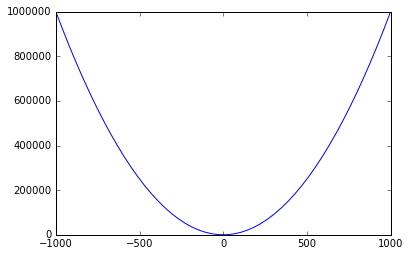

In [30]:
%matplotlib inline
from matplotlib import pyplot
import numpy as np

valeurs = np.linspace(- 1000, 1000)
# on crée un vecteur qui va de -1,000 à 1,000

def carré(x):
    return x ** 2

pyplot.plot(valeurs, carré(valeurs))

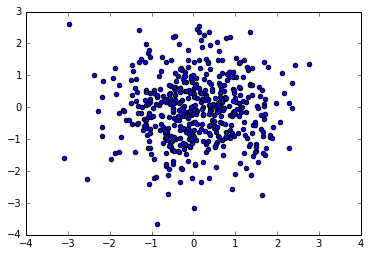

In [31]:
x = np.random.normal(size=500)
y = np.random.normal(size=500)
pyplot.scatter(x, y)

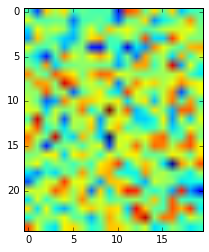

In [32]:
x = x.reshape(25, 20)

x.shape

pyplot.imshow(x)

### 4 - 3 - 2 Seaborn

Seaborn est une library construite par-dessus matplotlib et qui simplifie le code et ajoute quelques fonctionnalités. 

Nous allons nous servir de seaborn pour faire un heatmap à partir de nos données.

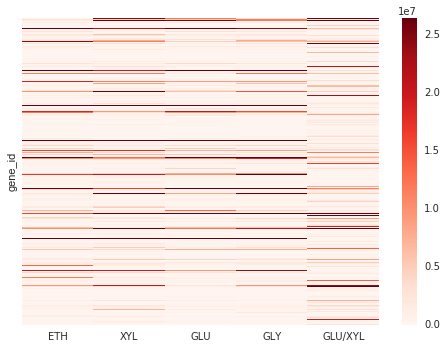

In [33]:
from seaborn import heatmap

from matplotlib.cm import Reds

heatmap(FPKM_table, robust=True, yticklabels=False, cmap=Reds)

Nous observons un certain nombre de gènes différentiellement exprimés entre les différentes conditions, mais les quelques gènes ayant un fort niveau d'expression créent un biais dans la table. Nous allons garder seulement les gènes qui ont un FPKM > 2e7.

In [34]:
gènes_surexprimés = FPKM_table[FPKM_table.apply(lambda x: max(x) < 2e7, axis=1)].index

gènes_surexprimés.shape

(2841,)

Seuls ~200 gènes ont un niveau un FPKM aussi élevé.

In [35]:
FPKM_table.drop(gènes_surexprimés, inplace=True)

FPKM_table.shape

(190, 5)

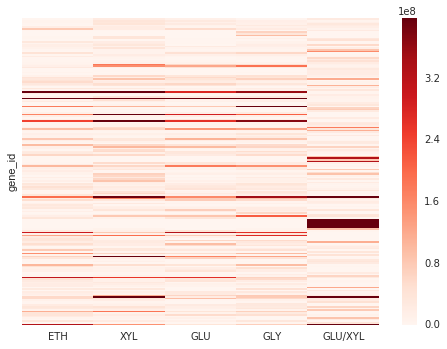

In [36]:
heatmap(FPKM_table, robust=True, yticklabels=False, cmap=Reds)

Nous pouvons ensuite étudier les gènes les plus surexprimés.

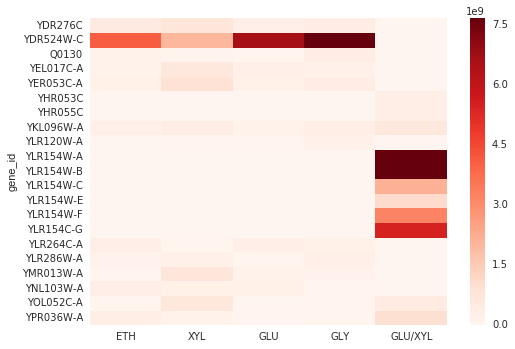

In [37]:
gènes_plus_surexprimés = FPKM_table[FPKM_table.apply(lambda x: max(x) < 2e8, axis=1)].index

heatmap(FPKM_table.drop(gènes_plus_surexprimés), robust=True, yticklabels=True, cmap=Reds)